In [1]:
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
dataset_directory = '/content/drive/MyDrive/ML Assignment Data/Assignment  3/Data'

In [4]:
data = image_dataset_from_directory(
    dataset_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=15,
    validation_split = None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1668 files belonging to 4 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

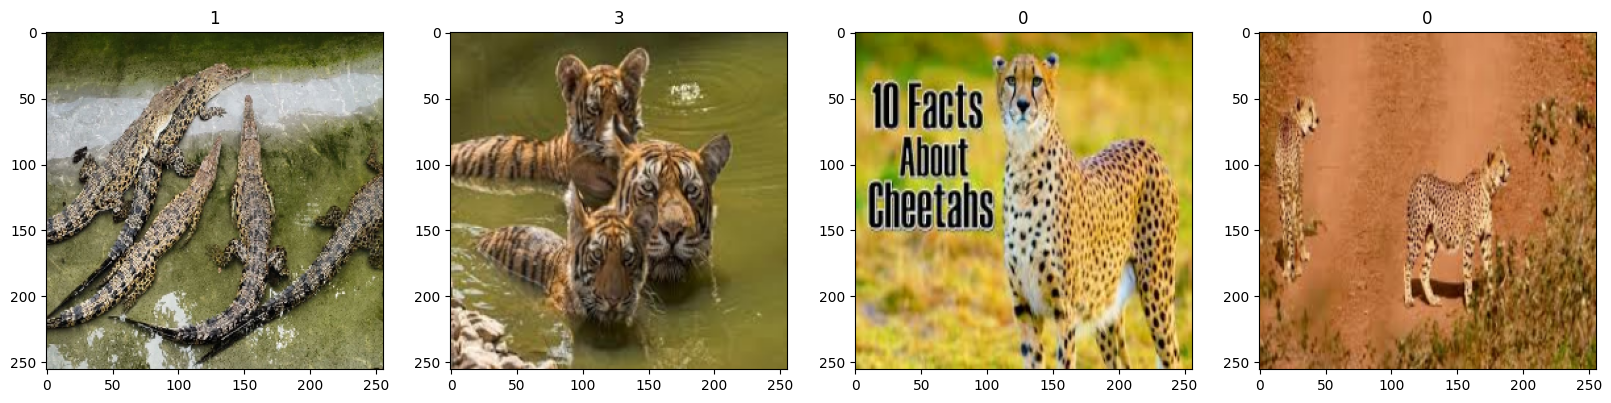

In [7]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [8]:
#Function to Normalize the Data
def normalize(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


In [9]:
#Normalizing the Data
data = data.map(normalize)

In [10]:
#Creating the Train Data and Test Data
data_cardinality = data.cardinality().numpy()
train_size = int(0.8*data_cardinality)
test_size = int(0.2*data_cardinality)

train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)

In [22]:
#Defining the Neural Network Architecture
number_of_classes = 4
model = models.Sequential([
Flatten(input_shape = (256,256,3)),
Dense(256,activation = 'relu'),
Dense(64,activation = 'relu'),
Dense(16,activation = 'relu'),
Dense(number_of_classes,activation = 'softmax')
])

In [23]:
#Compiling the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [24]:
model.fit(train_data,epochs = 30, validation_data = test_data)

Epoch 1/30
42/42 [==============================] - 14s 296ms/step - loss: 15.9215 - accuracy: 0.2530 - val_loss: 1.3862 - val_accuracy: 0.2156
Epoch 2/30
42/42 [==============================] - 13s 297ms/step - loss: 1.3974 - accuracy: 0.2478 - val_loss: 1.3842 - val_accuracy: 0.2062
Epoch 3/30
42/42 [==============================] - 13s 302ms/step - loss: 1.3839 - accuracy: 0.2448 - val_loss: 1.3832 - val_accuracy: 0.2719
Epoch 4/30
42/42 [==============================] - 13s 298ms/step - loss: 1.3822 - accuracy: 0.2872 - val_loss: 1.3808 - val_accuracy: 0.3219
Epoch 5/30
42/42 [==============================] - 13s 290ms/step - loss: 1.3811 - accuracy: 0.2775 - val_loss: 1.3780 - val_accuracy: 0.3031
Epoch 6/30
42/42 [==============================] - 14s 312ms/step - loss: 1.3793 - accuracy: 0.2887 - val_loss: 1.3798 - val_accuracy: 0.3156
Epoch 7/30
42/42 [==============================] - 13s 303ms/step - loss: 1.3778 - accuracy: 0.2798 - val_loss: 1.3750 - val_accuracy: 0.281

In [26]:
loss,accuracy = model.evaluate(test_data)

10/10 [==============================] - 4s 19ms/step - loss: 1.3573 - accuracy: 0.3187


In [27]:
print(f"Accuracy --> {accuracy}  Loss --> {loss}")

Accuracy --> 0.3187499940395355  Loss --> 1.3573024272918701
